In [1]:
#!pip install tensorflow
#!pip install keras

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM ,Dense ,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Chad.csv')

In [5]:
df.head()
df.shape

(3914, 6)

In [6]:
training_set = df.iloc[0:3000,1:2].values
testing_set = df.iloc[3000:-1,1:2].values

In [7]:
training_set.shape,testing_set.shape

((3000, 1), (913, 1))

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
scaled_train_dataset = scaler.fit_transform(training_set)

In [10]:
scaled_train_dataset

array([[0.95326167],
       [0.94291247],
       [0.92488482],
       ...,
       [0.307171  ],
       [0.30333178],
       [0.30293116]])

In [11]:
X_train=[]
y_train=[]
for i in range(60,scaled_train_dataset.shape[0]):
    X_train.append(scaled_train_dataset[i-60:i,0])
    y_train.append(scaled_train_dataset[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_train.shape,y_train.shape

((2940, 60), (2940,))

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [14]:
X_train.shape

(2940, 60, 1)

In [15]:
reg = Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

In [16]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
92/92 [==============================] - 21s 129ms/step - loss: 0.0055
Epoch 2/100
92/92 [==============================] - 12s 126ms/step - loss: 0.0031
Epoch 3/100
92/92 [==============================] - 12s 126ms/step - loss: 0.0027
Epoch 4/100
92/92 [==============================] - 12s 134ms/step - loss: 0.0021
Epoch 5/100
92/92 [==============================] - 12s 128ms/step - loss: 0.0018
Epoch 6/100
92/92 [==============================] - 12s 129ms/step - loss: 0.0020
Epoch 7/100
92/92 [==============================] - 12s 131ms/step - loss: 0.0018
Epoch 8/100
92/92 [==============================] - 12s 131ms/step - loss: 0.0015
Epoch 9/100
92/92 [==============================] - 12s 129ms/step - loss: 0.0016
Epoch 10/100
92/92 [==============================] - 12s 131ms/step - loss: 0.0014
Epoch 11/100
92/92 [==============================] - 12s 130ms/step - loss: 0.0013
Epoch 12/100
92/92 [==============================] - 13s 139ms/step - loss: 0.0014
E

In [17]:
scaled_test_dataset = scaler.fit_transform(testing_set)

In [18]:
X_test=[]
y_test=[]
for i in range(60,scaled_test_dataset.shape[0]):
    X_test.append(scaled_test_dataset[i-60:i,0])
    y_test.append(scaled_test_dataset[i,0])
X_test = np.array(X_test)
y_train = np.array(y_test)

In [19]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [20]:
y_pred=reg.predict(X_test)

In [21]:
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))

R2 Score: 96.54%


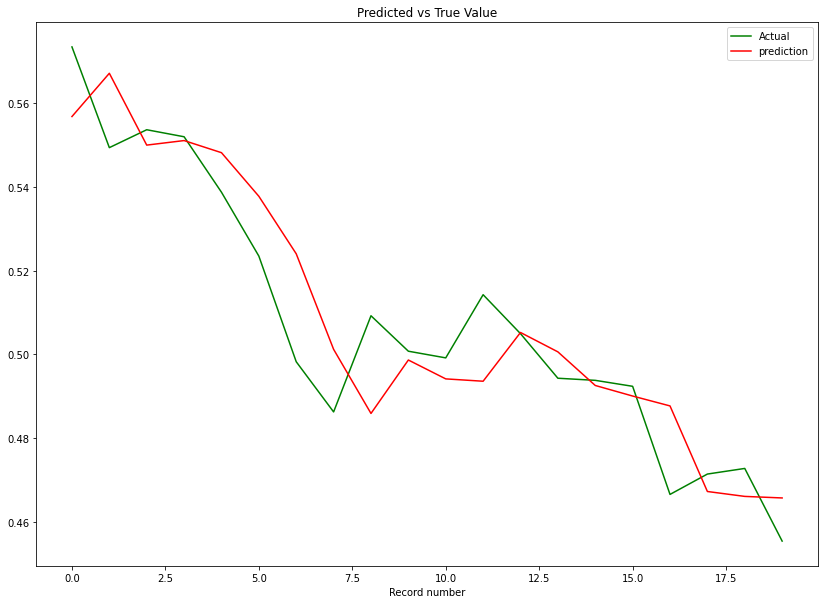

In [22]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),reg.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

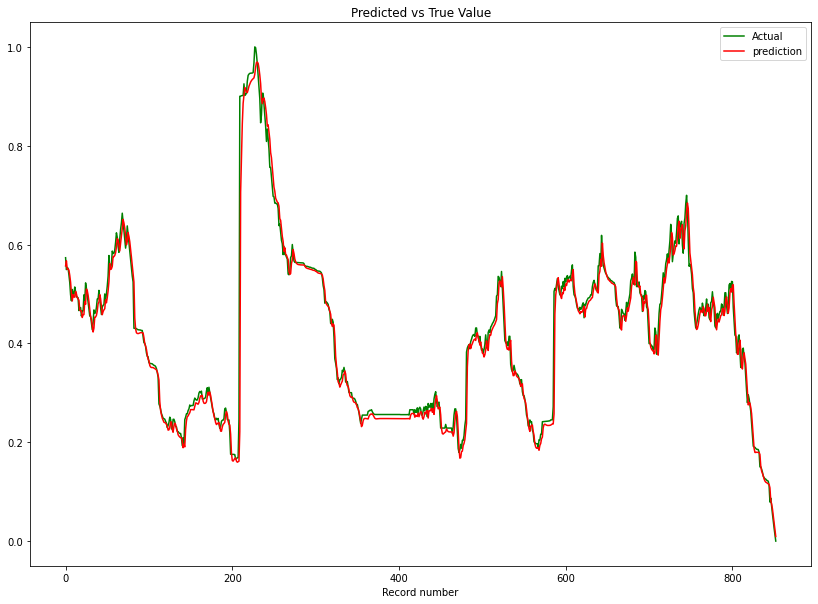

In [23]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(X_test)),reg.predict(X_test), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()